In [243]:
import  numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error ,r2_score

# Generate random function
These functions do not have any noise at this stage

In [244]:
# Set random seed for reproducibility
np.random.seed(42)
random_number = random.randint(1, 100)
random_float = random.random()

# Define three different functions
def linear_function(x):
    return random_number * x + 1

def sine_function(x):
    return np.sin(x) * random_number

def complex_function(x):
    return np.sin(x) * random_number + random_float * x**3 - random_float * x**2 + random_float * x + 5

def super_complex_function(x):
    return  np.sin(x) * random_number + np.cos(x) * random_number + random_number * x + random_float * x**3 - random_float * x**2 + random_float * x + 5

def generate_data_0noise(func, n_samples=200, noise_std=0):
    x = np.sort(np.random.uniform(-5, 5, n_samples))
    y = func(x)
    return x, y

# Generate data with noise

These functions have noise at this stage

In [245]:
def generate_data(func, n_samples=200, noise_std=0.3):
    x = np.sort(np.random.uniform(-5, 5, n_samples))
    y = func(x) + np.random.normal(0, noise_std, n_samples)
    return x, y

In [246]:
# Create datasets for training and testing
x_train_linear, y_train_linear = generate_data(linear_function)
x_train_sine, y_train_sine = generate_data(sine_function)
x_train_complex, y_train_complex = generate_data(complex_function)
x_train_super_complex, y_train_super_complex = generate_data(super_complex_function)

# Create datasets for training and testing without noise
x_train_linear_2, y_train_linear_2 = generate_data_0noise(linear_function)
x_train_sine_2, y_train_sine_2 = generate_data_0noise(sine_function)
x_train_complex_2, y_train_complex_2 = generate_data_0noise(complex_function)
x_train_super_complex_2, y_train_super_complex_2 = generate_data_0noise(super_complex_function)

# Create test datasets without noise
x_test = np.linspace(-5, 5, 1000)
y_test_linear = linear_function(x_test)
y_test_sine = sine_function(x_test)
y_test_complex = complex_function(x_test)
y_test_super_complex = super_complex_function(x_test)

 # Train MLP models

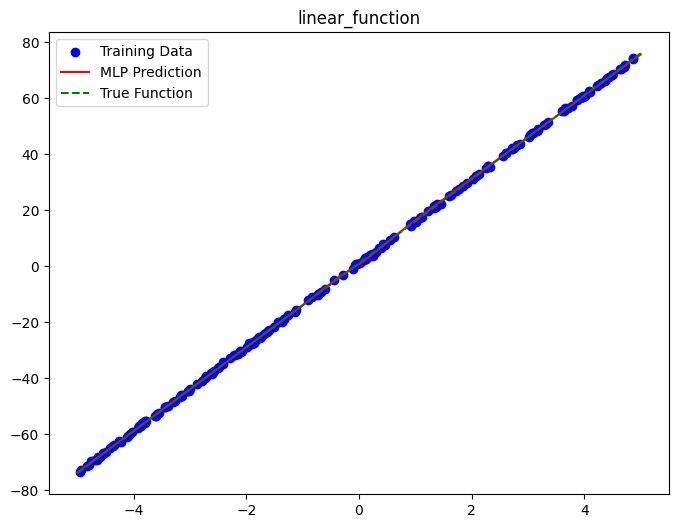

linear_function - Mean Squared Error: 0.0370
linear_function - R-squared (Accuracy): 1.0000



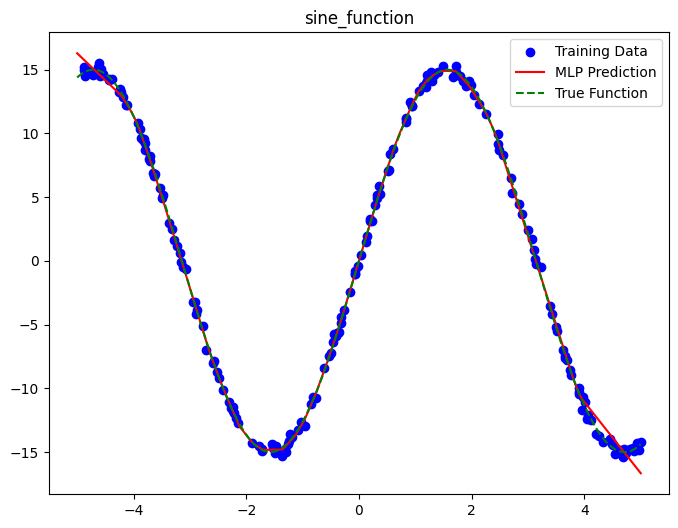

sine_function - Mean Squared Error: 0.1399
sine_function - R-squared (Accuracy): 0.9988



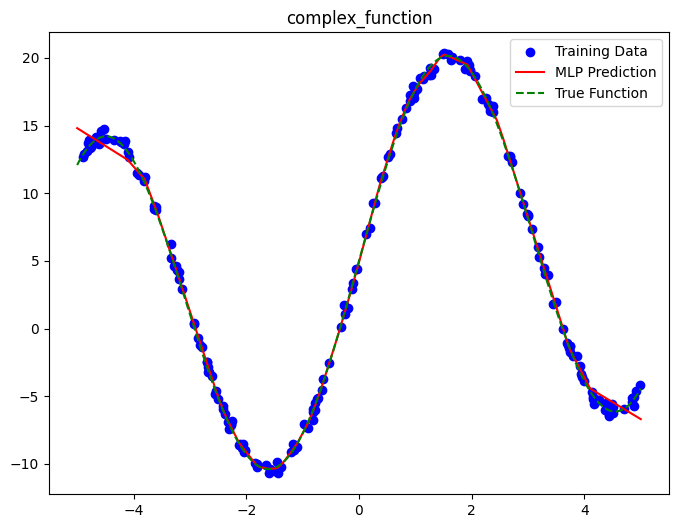

complex_function - Mean Squared Error: 0.1944
complex_function - R-squared (Accuracy): 0.9980



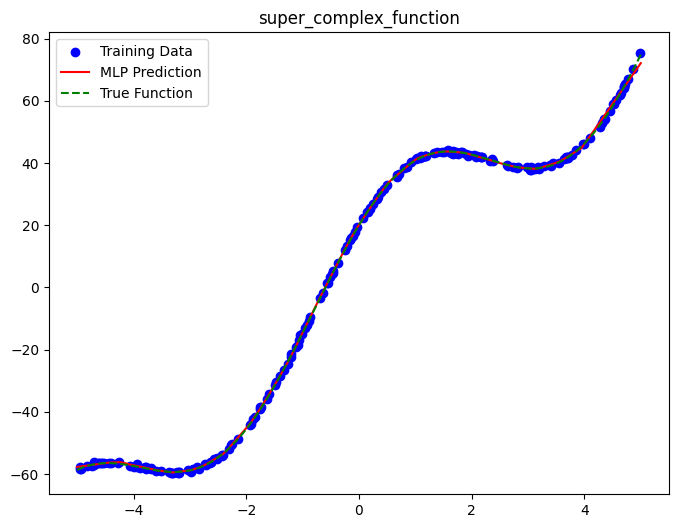

super_complex_function - Mean Squared Error: 0.1448
super_complex_function - R-squared (Accuracy): 0.9999



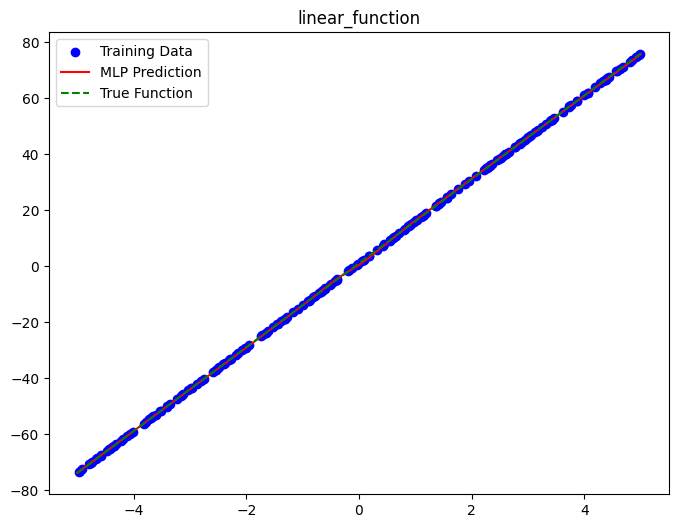

linear_function - Mean Squared Error: 0.0433
linear_function - R-squared (Accuracy): 1.0000



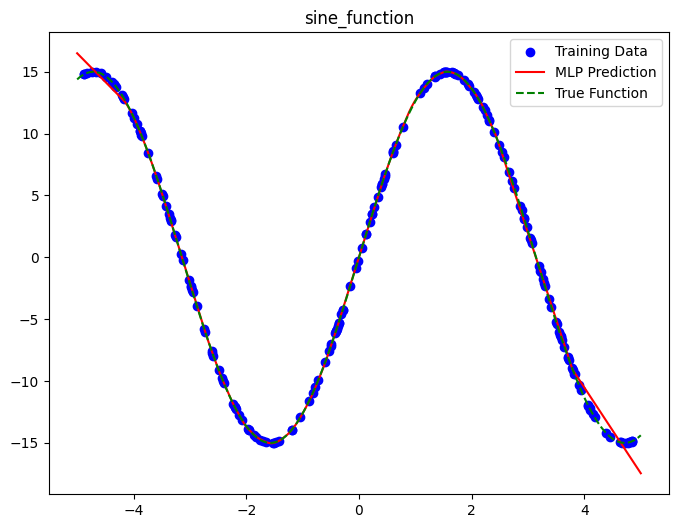

sine_function - Mean Squared Error: 0.2182
sine_function - R-squared (Accuracy): 0.9982



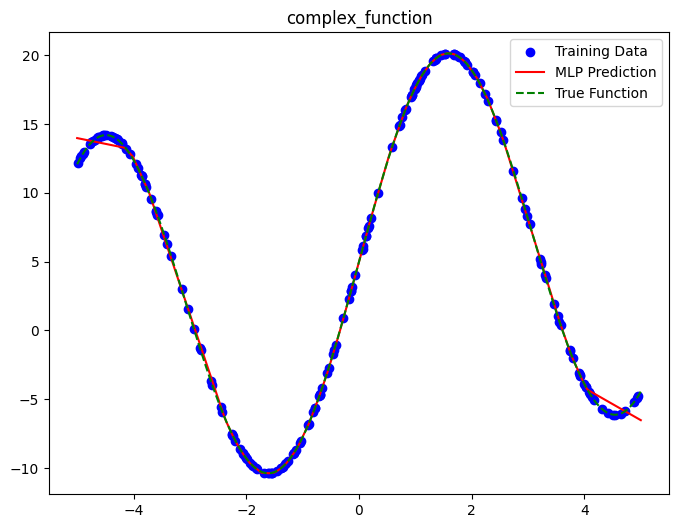

complex_function - Mean Squared Error: 0.1122
complex_function - R-squared (Accuracy): 0.9988



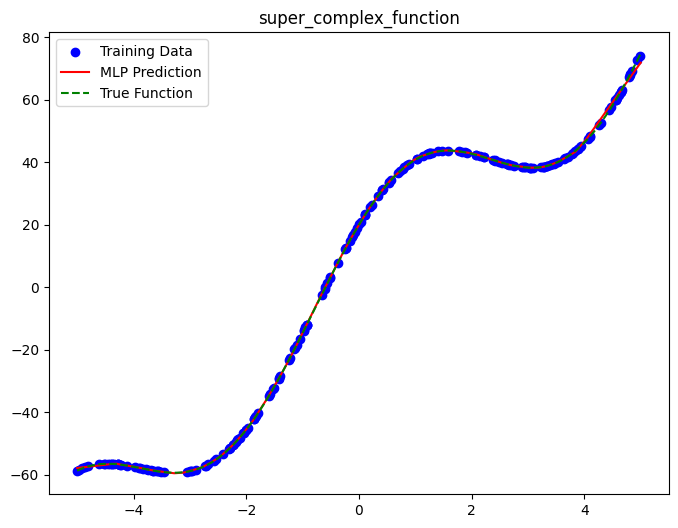

super_complex_function - Mean Squared Error: 0.1619
super_complex_function - R-squared (Accuracy): 0.9999



In [247]:
# Train MLP models
def train_mlp(x_train, y_train):
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=10000, random_state=42)
    #it's used to convert a 1D array (x_train) into a 2D array with a single column. 
    mlp.fit(x_train.reshape(-1, 1), y_train)
    y_pred = mlp.predict(x_test.reshape(-1, 1))
    return y_pred

def super_train_mlp(x_train, y_train):
    mlp = MLPRegressor(hidden_layer_sizes=(100, 70,60), max_iter=10000, random_state=42)
    mlp.learning_rate_init = 0.001
    #it's used to convert a 1D array (x_train) into a 2D array with a single column.
    mlp.fit(x_train.reshape(-1, 1), y_train)
    y_pred = mlp.predict(x_test.reshape(-1, 1))
    return y_pred

# Plot functions and MLP predictions
def plot_function_and_prediction(x_train, y_train, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train, y_train, label='Training Data', color='blue')
    plt.plot(x_test, y_pred, label='MLP Prediction', color='red')
    plt.plot(x_test, title(x_test), label='True Function', linestyle='--', color='green')
    plt.title(title.__name__)
    plt.legend()
    plt.show()
    mse = mean_squared_error(title(x_test), y_pred)
    r2 = r2_score(title(x_test), y_pred)
    print(f"{title.__name__} - Mean Squared Error: {mse:.4f}")
    print(f"{title.__name__} - R-squared (Accuracy): {r2:.4f}\n")

# Train and plot for each function
y_pred_linear = train_mlp(x_train_linear, y_train_linear)
plot_function_and_prediction(x_train_linear, y_train_linear, y_pred_linear, linear_function)

y_pred_sine = train_mlp(x_train_sine, y_train_sine)
plot_function_and_prediction(x_train_sine, y_train_sine, y_pred_sine, sine_function)

y_pred_complex = train_mlp(x_train_complex, y_train_complex)
plot_function_and_prediction(x_train_complex, y_train_complex, y_pred_complex, complex_function)

y_pred_super_complex = super_train_mlp(x_train_super_complex, y_train_super_complex)
plot_function_and_prediction(x_train_super_complex, y_train_super_complex, y_pred_super_complex, super_complex_function)

# Train and plot for each function without noise
y_pred_linear_2 = train_mlp(x_train_linear_2, y_train_linear_2)
plot_function_and_prediction(x_train_linear_2, y_train_linear_2, y_pred_linear_2, linear_function)

y_pred_sine_2 = train_mlp(x_train_sine_2, y_train_sine_2)
plot_function_and_prediction(x_train_sine_2, y_train_sine_2, y_pred_sine_2, sine_function)

y_pred_complex_2 = train_mlp(x_train_complex_2, y_train_complex_2)
plot_function_and_prediction(x_train_complex_2, y_train_complex_2, y_pred_complex_2, complex_function)

y_pred_super_complex_2 = super_train_mlp(x_train_super_complex_2, y_train_super_complex_2)
plot_function_and_prediction(x_train_super_complex_2, y_train_super_complex_2, y_pred_super_complex_2, super_complex_function)




# find best hidden_neurons

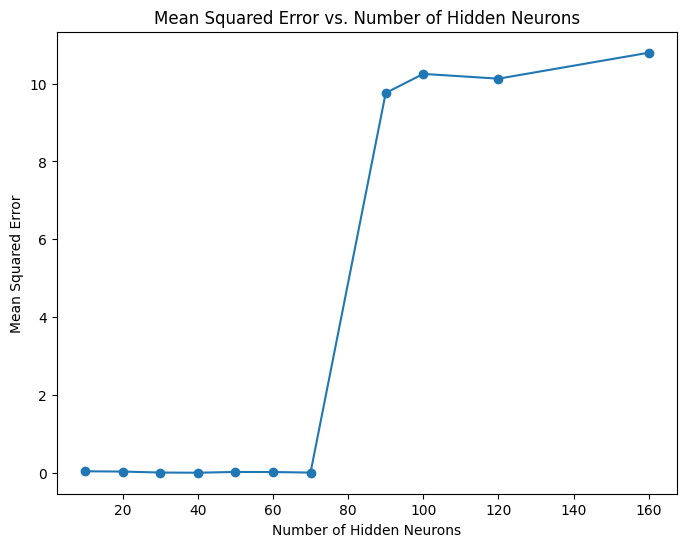

In [262]:
# Additional plot: Mean Squared Error vs. Number of Hidden Neurons
hidden_neurons = [10, 20, 30, 40, 50, 60, 70, 90, 100, 120, 160]
mse_values = []

for neurons in hidden_neurons:
    mlp = MLPRegressor(hidden_layer_sizes=(200,neurons), max_iter=10000, random_state=42)
    mlp.fit(x_train_linear_2.reshape(-1, 1), y_train_linear_2)
    y_pred = mlp.predict(x_test.reshape(-1, 1))
    mse = mean_squared_error(y_test_linear, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(8, 6))
plt.plot(hidden_neurons, mse_values, marker='o')
plt.title('Mean Squared Error vs. Number of Hidden Neurons')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Mean Squared Error')
plt.show()